<a href="https://colab.research.google.com/github/rkassila/Medical_AImaging/blob/master/Small_models_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Drive and Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import pathlib
import cv2
import glob
import os

#import keras

#import matplotlib.pyplot as plt
#import numpy as np
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras import layers, models
#from sklearn.model_selection import train_test_split
#import tensorflow as tf

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten
#from transformers import TFAutoModelForImageClassification, AutoImageProcessor

#from sklearn.metrics import accuracy_score
#from tensorflow.keras import layers, models, optimizers

#from tensorflow.keras.applications import imagenet_utils, efficientnet

#from tensorflow.keras.preprocessing import image

#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Conv2D, concatenate, UpSampling2D

# Import images

In [7]:
!pwd

/Users/Reda/Developer/CheeseReco/notebooks


In [2]:
fromages_df = pd.read_csv('../data/fromages.csv',sep=';' )
fromages_df

Departement                Fromage  \
0            Allier              Charolais   
1               Lot         Bleu du Quercy   
2           Réunion               Cap Noir   
3            Savoie    Persillé des Aravis   
4    Saône-et-Loire      Bouton de Culotte   
..              ...                    ...   
333          Loiret                  Chécy   
334          Lozère    Persillé du Malzieu   
335         Réunion  Délice de la Sicalait   
336        Charente               Chavroux   
337            Aube          Brie de Melun   

                                        page_francaise    Lait  
0    http://fr.wikipedia.org/wiki/Charolais_%28from...  Chèvre  
1          http://fr.wikipedia.org/wiki/Bleu_du_Quercy   Vache  
2    http://fr.wikipedia.org/wiki/Cap_Noir_%28froma...   Vache  
3    http://fr.wikipedia.org/wiki/Persill%C3%A9_des...  Chèvre  
4       http://fr.wikipedia.org/wiki/Bouton_de_Culotte  Chèvre  
..                                                 ...     ...  
333  http://fr.wikipedia.org/wiki/Ch%C3%A9cy_%28fro...   Vache  
334  http://fr.wikipedia.org/wiki/Persill%C3%A9_du_...  Brebis  
335  http://fr.wikipedia.org/wiki/D%C3%A9lice_de_la...   Vache  
336              http://fr.wikipedia.org/wiki/Chavroux  Chèvre  
337         http://fr.wikipedia.org/wiki/Brie_de_Melun   Vache  

[338 rows x 4 columns]

In [ ]:
parent_folder = "../data/photos/"

images = []

for index, row in fromages_df.iterrows():
    cheese_name = row['Fromage']
    print(cheese_name)
    cheese_folder = os.path.join(parent_folder, cheese_name)
    
    if os.path.isdir(cheese_folder):
        photo_paths = [os.path.join(cheese_folder, file) for file in os.listdir(cheese_folder) if file.endswith(('.png', '.jpg', '.jpeg'))]
        
        for path in photo_paths:
            image = cv2.imread(path)
            if image is not None:
                images.append(image)
            else:
                print(f"Unable to read image: {path}")
    else:
        print(f"Cheese folder not found: {cheese_folder}")

print(f"Number of images imported: {len(images)}")

Charolais
Bleu du Quercy
Cap Noir
Persillé des Aravis
Bouton de Culotte
Brie de Melun
Pérail
Pont-l'évêque
Trappiste de Campénéac
Comté
Pavé corrézien
Bleu de Gex


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Tome des Bauges


libpng warning: iCCP: known incorrect sRGB profile


Abbaye de Tamié
Pélardon
Roquefort
Munster
Munster
Clon
Chèvreton
Carré d'Aurillac
Affidélice
Pouligny-saint-pierre
Couronne Lochoise
Abbaye de la Joie Notre-Dame
Tomme au foin
Le Lavort
Takamaka
Avalin
Brie de Meaux
Foudjou
Arôme de Lyon


libpng warning: iCCP: known incorrect sRGB profile


Bleu de Termignon
Saint Agur
Bleu de Thiézac
Corsica


libpng warning: iCCP: known incorrect sRGB profile


Chandamour
Pannes cendré
Rocamadour
Petit moka
Fromage aux noix
Laguiole
Abbaye de Belloc


libpng warning: iCCP: known incorrect sRGB profile


Sainte-Maure de Touraine
Soumaintrain


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Le Rogallais
Pérail
Rochebaron


libpng warning: iCCP: known incorrect sRGB profile


Jonchée
Tricorne de Marans
L'Ami du Chambertin
Le Pavé du Plessis
Bleu de Lavaldens
Le Rouchi à l'échalote
Crémet du Cap Blanc Nez
Le Sire de Créquy
Kiri


libpng error: IDAT: CRC error


Unable to read image: ../data/photos/Kiri/Kirifromage35.png
Pont-l'évêque
Gruyère français


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Chaumes
Laguiole
Gruyère français


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Chaussée aux moines


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Le Graval
Gruyère français


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Époisses
Chevret du Haut-Jura
Moelleux du Revard
Chaource
Bleu d'Auvergne


libpng warning: iCCP: known incorrect sRGB profile


Gabriel Coulet
Chambérat
Pavé d'Auge
Coutances
La Petite Raclette
Fontainebleau
Salers
Gruyère français


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Le Coucouron
Amou
Rebarbe
Mâconnais
Crottin de Chavignol
Fourme d'Ambert
Morbier
Morbier
Saint-nectaire
Fourme de Montbrison
Langres
Rigotte de Condrieu


libpng warning: iCCP: known incorrect sRGB profile


Petit Billy
Tome de Rhuys
Aisy cendré
Tomme de Gorze
Le Brebiou
Tomme de Savoie
Saint-florentin
Dauphin
Picodon
Saint-laurent
Tomette de Brebis
Mont Bébour
Beaufort
Sainte-Maure de Touraine
Époisses
Boule des moines


libpng warning: iCCP: known incorrect sRGB profile


Gruyère français


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Sainte-Maure de Touraine
Pélardon
Cathare
Tracle
Caillé
Morbier
Rigotte de Condrieu


libpng warning: iCCP: known incorrect sRGB profile


A Filetta


libpng warning: iCCP: known incorrect sRGB profile


Baguette paysanne à la moutarde
La Fournaise
Mottin charentais
Bleu des Causses
Rollot
Pont-l'évêque
Pont-l'évêque
Le Rustique
Bessay
Carré de Bonneville
Tomme de Montagne


libpng warning: iCCP: known incorrect sRGB profile


Ti frais des Hauts


libpng warning: iCCP: known incorrect sRGB profile


Abondance
Trappe Échourgnac
Saint-nectaire
Crottin de Chavignol
Gourmelin
Saint-gildas-des-bois
Valençay
Mimolette
Bresse Bleu
Coulommiers
Cabécou
Pourri bressan
Munster
Le Curé Nantais


libpng warning: iCCP: known incorrect sRGB profile


Fourme de Rochefort-Montagne
Bleu du Mont-Cenis
Autun


libpng warning: iCCP: known incorrect sRGB profile


Brie de Montereau
Tome fraîche
Tomme crayeuse
Brin d'amour
Pélardon
Patay
Bleu de Laqueuille
Mâconnais
Bouille
Fromage aux artisons
Brie de Meaux
Fourme de Montbrison
Bleu d'Auvergne


libpng warning: iCCP: known incorrect sRGB profile


Faisselle
Fourmagée
Caillebotte
Persillé de Tignes
Munster
Lou Pérac
St Môret
Pavé d'Auge
Pic du Vieux Chaillol
Piton Maïdo
Chevrotin
Gruyère français


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Pélardon
Brie de Melun
Bleu du Vercors-Sassenage
Bleu du Vercors-Sassenage
P'tit Basque
Pont-l'évêque
Bleu d'Auvergne


In [3]:
limite = 200

In [4]:
base_url = 'data/photos'

In [8]:
url_brain = base_url + 'MR/brain/'

In [21]:
files_brain = glob.glob(url_brain + "*.png") + glob.glob(url_brain + "*.jpeg")
images_brain = [cv2.imread(file) for file in image_files[:limite]]

In [22]:
labels_brain = ["brain"] * len(images_brain)

# Checking data

In [29]:
normal_knee_count = len(images_acute_infarct)
normal_knee_count

200

In [30]:
images_acute_infarct[0].shape

(224, 224)

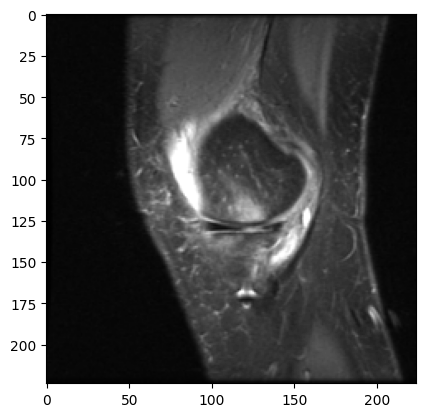

In [344]:
img = np.asarray(images_knee_soft_tissue_fluid[3])
imgplot = plt.imshow(img, cmap='gray')

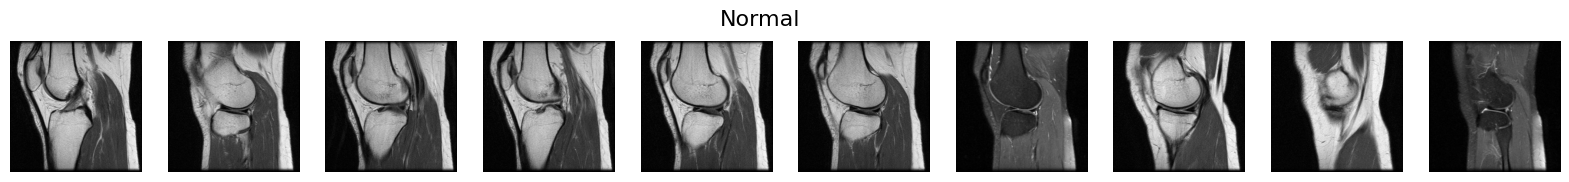

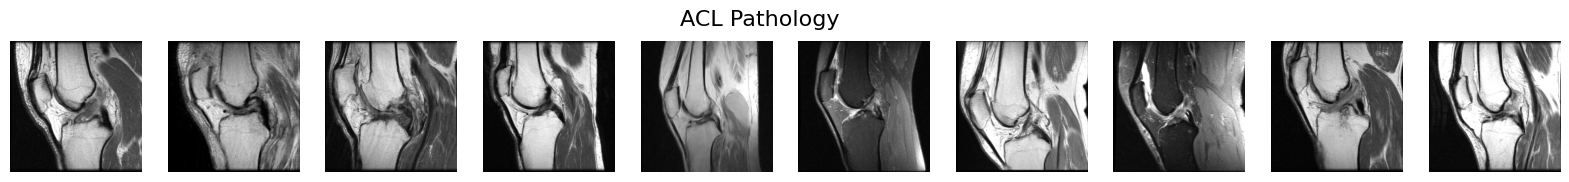

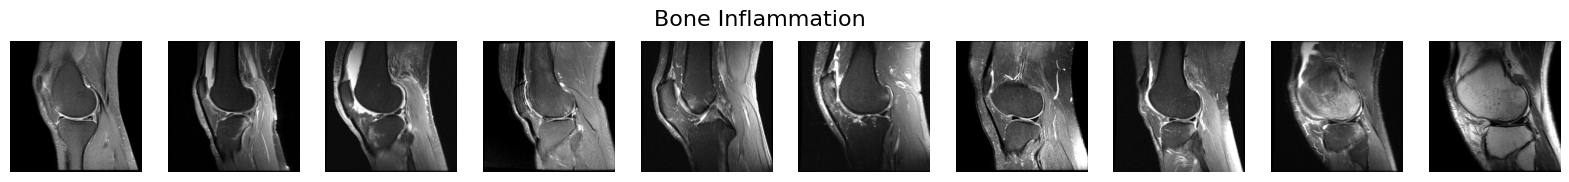

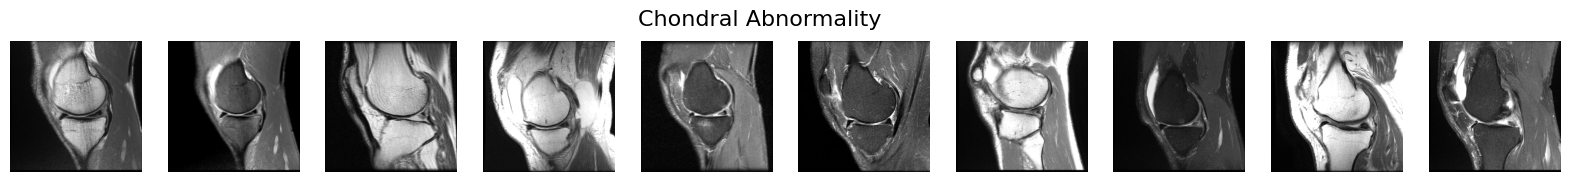

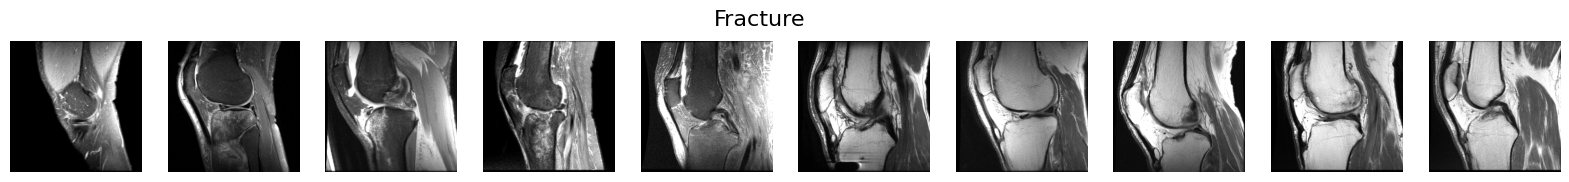

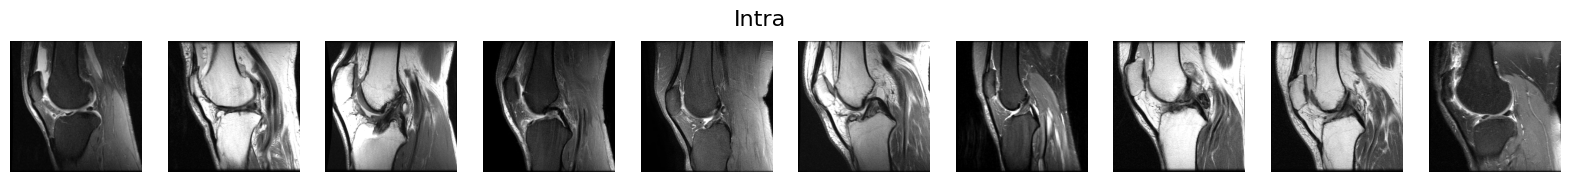

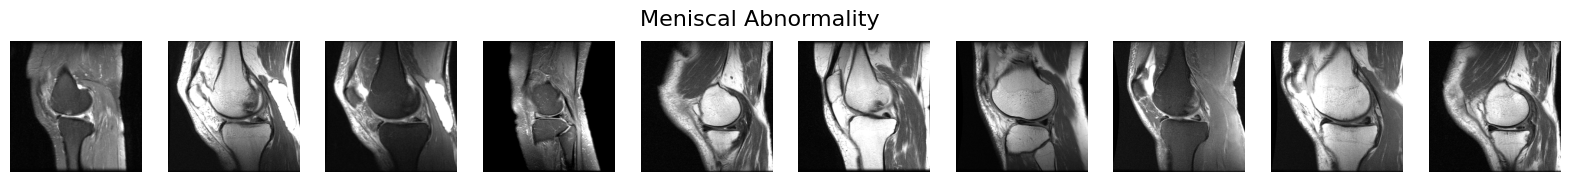

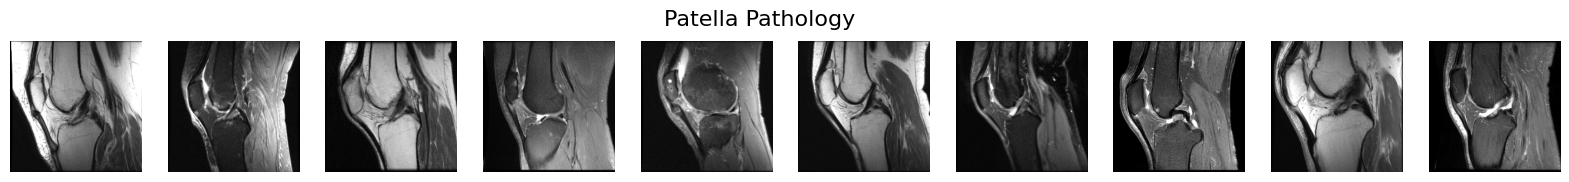

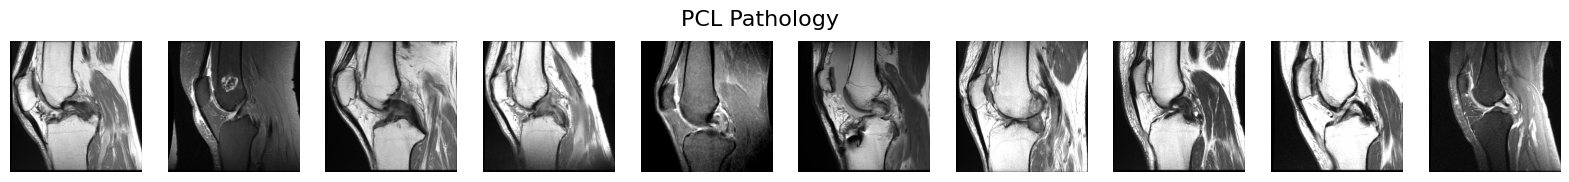

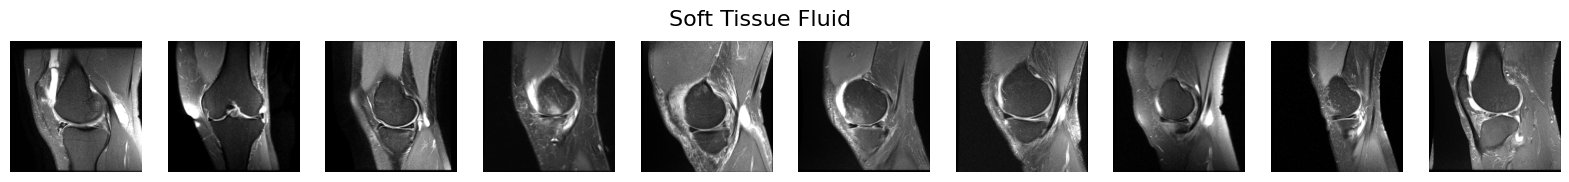

In [365]:
import matplotlib.pyplot as plt

# Define a function to display images
def display_images(images, class_name):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    fig.suptitle(class_name, fontsize=16)
    for i in range(10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

# Display 10 images for each class
classes = ['Normal', 'ACL Pathology', 'Bone Inflammation', 'Chondral Abnormality', 'Fracture',
           'Intra', 'Meniscal Abnormality', 'Patella Pathology', 'PCL Pathology', 'Soft Tissue Fluid']

image_lists = [images_knee_normal, images_knee_acl_pathology, images_knee_bone_inflammation,
               images_knee_chondral_abnormality, images_knee_fracture, images_knee_intra,
               images_knee_meniscal_abnormality, images_knee_patella_pathology,
               images_knee_pcl_pathology, images_knee_soft_tissue_fluid]

for i, class_images in enumerate(image_lists):
    display_images(class_images[:10], classes[i])


# Creating simple model

In [109]:
#def initialize_model(length):
#
#    model = models.Sequential()
#
#    model.add(layers.Conv2D(16, (4,4), activation="tanh", input_shape=(224, 224,1)))
#    model.add(layers.MaxPool2D(pool_size=(4,4)))
#
#    model.add(layers.Conv2D(32, (3,3), activation="relu"))
#    model.add(layers.MaxPool2D(pool_size=(2,2)))
#
#    model.add(layers.Conv2D(64, (3,3), activation="relu"))
#    model.add(layers.MaxPool2D(pool_size=(2,2)))
#
#    model.add(layers.Conv2D(128, (2,2), activation="relu"))
#    model.add(layers.MaxPool2D(pool_size=(2,2)))
#
#    model.add(layers.Flatten())
#
#    model.add(layers.Dense(32, activation='relu'))
#
#    model.add(layers.Dense(length, activation='softmax'))
#
    ### Model compilation
#    model.compile(loss='sparse_categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])


#    return model

In [459]:
def initialize_model(length):

    model = models.Sequential()

    model.add(layers.Conv2D(16, (3, 3), activation="tanh", padding="same", input_shape=(224, 224, 1), name="conv1"))

    model.add(layers.Conv2D(32, (4, 4), activation="relu", name="conv2"))
    model.add(layers.MaxPool2D(pool_size=(4, 4)))

    model.add(layers.Conv2D(64, (3,3), activation="relu", name="conv3"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(256, (3,3), activation="relu", name="conv4"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(256, (3,3), activation="relu", name="conv5"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128, (2,2), activation="relu", name="conv6"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(length, activation='softmax'))

    ### Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


    return model

# Data normalization

In [103]:
def normalize_images(images):
    # Concatenate all images into a single array
    concatenated_images = np.concatenate(images, axis=0)

    max_pixel_value = 255

    # Normalize the concatenated images
    normalized_images = concatenated_images.astype(np.float32) / max_pixel_value

    return normalized_images

In [345]:
# Define lists of images for each organ
lung_images = [images_normal_lung, images_airspace_opacity, images_bronchiectasis, images_nodule, images_parenchyma_destruction, images_interstitial_lung_disease]
brain_images = [images_acute_infarct, images_chronic_infarct, images_extra, images_focal_flair_hyper, images_intra_brain, images_white_matter_changes]
knee_images = [images_knee_normal, images_knee_acl_pathology, images_knee_bone_inflammation, images_knee_chondral_abnormality, images_knee_fracture, images_knee_intra, images_knee_meniscal_abnormality, images_knee_patella_pathology, images_knee_pcl_pathology, images_knee_soft_tissue_fluid]
shoulder_images = [images_normal_shoulder, images_acj_oa, images_biceps_pathology, images_ghj_oa, images_labral_pathology, images_marrow_inflammation, images_osseous_lesion, images_post_op, images_soft_tissue_edema, images_soft_tissue_fluid_shoulder, images_supraspinatus_pathology]
spine_images = [images_normal_spine, images_cord_pathology, images_cystic_lesions, images_disc_pathology, images_osseous_abn]

In [346]:
# Normalize images for each organ
normalized_lung_X = normalize_images(lung_images)
normalized_brain_X = normalize_images(brain_images)
normalized_knee_X = normalize_images(knee_images)
normalized_shoulder_X = normalize_images(shoulder_images)
normalized_spine_X = normalize_images(spine_images)

In [347]:
# Print the shape of the normalized arrays for each organ
print("Shape of normalized lung images:", normalized_lung_X.shape)
print("Shape of normalized brain images:", normalized_brain_X.shape)
print("Shape of normalized knee images:", normalized_knee_X.shape)
print("Shape of normalized shoulder images:", normalized_shoulder_X.shape)
print("Shape of normalized spine images:", normalized_spine_X.shape)

Shape of normalized lung images: (1200, 224, 224)
Shape of normalized brain images: (1200, 224, 224)
Shape of normalized knee images: (2000, 224, 224)
Shape of normalized shoulder images: (2200, 224, 224)
Shape of normalized spine images: (1000, 224, 224)


In [368]:
# Concatenate the labels for each organ
y_lung = np.concatenate((labels_normal_lung, labels_airspace_opacity, labels_bronchiectasis, labels_nodule, labels_parenchyma_destruction, labels_interstitial_lung_disease))
y_brain = np.concatenate((labels_acute_infarct, labels_chronic_infarct, labels_extra, labels_focal_flair_hyper, labels_intra_brain, labels_white_matter_changes))
y_knee = np.concatenate((labels_knee_normal, labels_knee_acl_pathology, labels_knee_bone_inflammation, labels_knee_chondral_abnormality, labels_knee_fracture, labels_knee_intra, labels_knee_meniscal_abnormality, labels_knee_patella_pathology, labels_knee_pcl_pathology, labels_knee_soft_tissue_fluid))
y_shoulder = np.concatenate((labels_normal_shoulder, labels_acj_oa, labels_biceps_pathology, labels_ghj_oa, labels_labral_pathology, labels_marrow_inflammation, labels_osseous_lesion, labels_post_op, labels_soft_tissue_edema, labels_soft_tissue_fluid_shoulder, labels_supraspinatus_pathology))
y_spine = np.concatenate((labels_normal_spine, labels_cord_pathology, labels_cystic_lesions, labels_disc_pathology, labels_osseous_abn))

# Testing simple model (with lung)

In [110]:
X = normalized_lung_X
y = y_lung

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [112]:
def reshape_data_for_convolutional(X):
    """
    Reshape input data for convolutional neural networks.

    Parameters:
        X (numpy.ndarray): Input data array with shape (num_samples, height, width).

    Returns:
        numpy.ndarray: Reshaped input data array with shape (num_samples, height, width, 1).
    """
    return X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [113]:
X_train.shape

(960, 224, 224)

In [114]:
# Reshape X_train to include the channel dimension
X_train_reshaped = reshape_data_for_convolutional(X_train)
X_test_reshaped = reshape_data_for_convolutional(X_test)

# Verify the new shape
print("New shape of X_train:", X_train_reshaped.shape)
print("New shape of X_test:", X_test_reshaped.shape)

New shape of X_train: (960, 224, 224, 1)
New shape of X_test: (240, 224, 224, 1)


In [121]:
model = initialize_model(len(set(y)))

In [122]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 221, 221, 16)      272       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 55, 55, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 53, 53, 64)        9280      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 26, 26, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 256)       147712    
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 12, 12, 256)      

In [123]:
es = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train,
                    epochs=40,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)


Epoch 1/40
12/12 [==============================] - 3s 36ms/step - loss: 1.8034 - accuracy: 0.1914 - val_loss: 1.7873 - val_accuracy: 0.1771
Epoch 2/40
12/12 [==============================] - 0s 15ms/step - loss: 1.7219 - accuracy: 0.2409 - val_loss: 1.5895 - val_accuracy: 0.2917
Epoch 3/40
12/12 [==============================] - 0s 14ms/step - loss: 1.4741 - accuracy: 0.3320 - val_loss: 1.8106 - val_accuracy: 0.2604
Epoch 4/40
12/12 [==============================] - 0s 14ms/step - loss: 1.5421 - accuracy: 0.2943 - val_loss: 1.6159 - val_accuracy: 0.2865
Epoch 5/40
12/12 [==============================] - 0s 19ms/step - loss: 1.4478 - accuracy: 0.3372 - val_loss: 1.4406 - val_accuracy: 0.3594
Epoch 6/40
12/12 [==============================] - 0s 15ms/step - loss: 1.3298 - accuracy: 0.3971 - val_loss: 1.4384 - val_accuracy: 0.3594
Epoch 7/40
12/12 [==============================] - 0s 14ms/step - loss: 1.3241 - accuracy: 0.4049 - val_loss: 1.4443 - val_accuracy: 0.3490
Epoch 8/40
12

In [124]:
test_results = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

8/8 [==============================] - 0s 26ms/step - loss: 0.9710 - accuracy: 0.6167
Test Loss: 0.9710246324539185
Test Accuracy: 0.6166666746139526


# Testing EfficientNet

In [96]:
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input

# Assuming X_train_reshaped is your grayscale images with shape (num_samples, height, width)
# Convert grayscale images to RGB format
X_train_rgb = np.repeat(X_train_reshaped, 3, axis=-1)

# Verify the new shape
print("New shape of X_train_rgb:", X_train_rgb.shape)

# Define the input shape of your grayscale images
input_shape = X_train_rgb.shape[1:]  # Shape of one sample, excluding the batch size

# Define the input layer with the desired shape
input_layer = Input(shape=input_shape)

# Load the EfficientNetB0 model with imagenet weights, excluding the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

New shape of X_train_rgb: (960, 224, 224, 3)


In [97]:
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(64, activation='tanh')(x)

num_classes = len(set(y))
output_layer = layers.Dense(num_classes, activation='softmax')(x)

fine_tuned_model = models.Model(inputs=base_model.input, outputs=output_layer)

fine_tuned_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [98]:
es = EarlyStopping(patience = 10, restore_best_weights=True)

history = fine_tuned_model.fit(
    X_train_reshaped,
    y_train,
    epochs=100,
    callbacks=[es],
    validation_split=0.2
)

Epoch 1/100
24/24 [==============================] - 9s 99ms/step - loss: 2.0492 - accuracy: 0.1810 - val_loss: 1.8865 - val_accuracy: 0.1354
Epoch 2/100
24/24 [==============================] - 1s 30ms/step - loss: 1.8607 - accuracy: 0.1680 - val_loss: 1.8245 - val_accuracy: 0.1979
Epoch 3/100
24/24 [==============================] - 1s 31ms/step - loss: 1.8274 - accuracy: 0.1523 - val_loss: 1.8156 - val_accuracy: 0.1354
Epoch 4/100
24/24 [==============================] - 1s 30ms/step - loss: 1.8169 - accuracy: 0.1823 - val_loss: 1.8112 - val_accuracy: 0.1354
Epoch 5/100
24/24 [==============================] - 1s 24ms/step - loss: 1.8074 - accuracy: 0.1589 - val_loss: 1.8575 - val_accuracy: 0.1354
Epoch 6/100
24/24 [==============================] - 1s 24ms/step - loss: 1.8254 - accuracy: 0.1823 - val_loss: 1.8539 - val_accuracy: 0.1354
Epoch 7/100
24/24 [==============================] - 1s 24ms/step - loss: 1.8136 - accuracy: 0.1823 - val_loss: 1.8318 - val_accuracy: 0.1354
Epoch 

In [100]:
X_test_rgb = np.repeat(X_test_reshaped, 3, axis=-1)

In [101]:
test_results = fine_tuned_model.evaluate(X_test_rgb, y_test)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

8/8 [==============================] - 2s 30ms/step - loss: 1.7995 - accuracy: 0.1417
Test Loss: 1.7995177507400513
Test Accuracy: 0.14166666567325592


EfficientNet being trained on RGB images, it workd poorly compared to our custom model

# Testing data augmentation (for lung)

### Lung

In [126]:
img_height = 224
img_width = 224
num_channels = 1

In [410]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters for each class
datagen_params = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists
class_labels = [labels_normal_lung,
                labels_airspace_opacity,
                labels_bronchiectasis,
                labels_nodule,
                labels_parenchyma_destruction,
                labels_interstitial_lung_disease]
class_images = [images_normal_lung,
                images_airspace_opacity,
                images_bronchiectasis,
                images_nodule,
                images_parenchyma_destruction,
                images_interstitial_lung_disease]

# Create lists to hold augmented images and labels
augmented_lung_images_batches = []
y_lung_augmented_batches = []

# Iterate over each class and apply data augmentation separately
for class_label, class_image_list in zip(class_labels, class_images):
    # Create an ImageDataGenerator for the current class
    datagen = ImageDataGenerator(**datagen_params)

    # Convert images to numpy array
    class_images_array = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array = class_images_array.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen.fit(class_images_array)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images = datagen.flow(class_images_array, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class
    max_images_per_class = 1024

    # Collect augmented images and labels until the desired number is reached
    num_images_collected = 0
    for batch in augmented_images:
        augmented_lung_images_batches.append(batch[0])
        y_lung_augmented_batches.append(batch[1])
        num_images_collected += batch[0].shape[0]
        if num_images_collected >= max_images_per_class:
            break

# Concatenate augmented images and labels
augmented_lung_images = np.concatenate(augmented_lung_images_batches)
y_lung_augmented = np.concatenate(y_lung_augmented_batches)

In [411]:
X_lung = augmented_lung_images
y_lung = y_lung_augmented

In [412]:
augmented_lung_images.shape

(6384, 224, 224, 1)

In [286]:
y_lung_augmented.shape

(6384,)

In [413]:
X_train_lung, X_test_lung, y_train_lung, y_test_lung = train_test_split(X_lung, y_lung, test_size=0.2, shuffle=True)

In [460]:
lung_model = initialize_model(len(set(y_lung)))

In [461]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history = lung_model.fit(X_train_lung, y_train_lung,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
32/32 [==============================] - 4s 60ms/step - loss: 1.6732 - accuracy: 0.2406 - val_loss: 1.3096 - val_accuracy: 0.3366
Epoch 2/40
32/32 [==============================] - 1s 46ms/step - loss: 1.2158 - accuracy: 0.3897 - val_loss: 1.2025 - val_accuracy: 0.3718
Epoch 3/40
32/32 [==============================] - 1s 46ms/step - loss: 1.1491 - accuracy: 0.4382 - val_loss: 1.1926 - val_accuracy: 0.4188
Epoch 4/40
32/32 [==============================] - 1s 46ms/step - loss: 1.0716 - accuracy: 0.5126 - val_loss: 1.0375 - val_accuracy: 0.5656
Epoch 5/40
32/32 [==============================] - 1s 46ms/step - loss: 1.0275 - accuracy: 0.5518 - val_loss: 1.0233 - val_accuracy: 0.5519
Epoch 6/40
32/32 [==============================] - 1s 46ms/step - loss: 0.9571 - accuracy: 0.5851 - val_loss: 0.9423 - val_accuracy: 0.5861
Epoch 7/40
32/32 [==============================] - 1s 47ms/step - loss: 0.9134 - accuracy: 0.6110 - val_loss: 1.0223 - val_accuracy: 0.5489
Epoch 8/40
32

In [473]:
test_results_lung = lung_model.evaluate(X_test_lung, y_test_lung)
print("Test Loss:", test_results_lung[0])
print("Test Accuracy:", test_results_lung[1])

40/40 [==============================] - 0s 7ms/step - loss: 0.7237 - accuracy: 0.8575
Test Loss: 0.7236829996109009
Test Accuracy: 0.8574784398078918


Smart Data Augmentation increase our accuracy from ~60% to ~80%



In [474]:
model.save('/content/drive/My Drive/Colab_Notebooks/models/lung_class_model_with_normal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Trying diseased only

In [213]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters for each class
datagen_params = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest'
}

# Define class labels and corresponding image lists
class_labels_diseased = [labels_airspace_opacity, labels_bronchiectasis, labels_nodule, labels_parenchyma_destruction, labels_interstitial_lung_disease]
class_images_diseased = [images_airspace_opacity, images_bronchiectasis, images_nodule, images_parenchyma_destruction, images_interstitial_lung_disease]

# Create lists to hold augmented images and labels
augmented_lung_images_batches_diseased = []
y_lung_augmented_batches_diseased = []

# Iterate over each class and apply data augmentation separately
for class_label_diseased, class_image_list_diseased in zip(class_labels_diseased, class_images_diseased):
    # Create an ImageDataGenerator for the current class
    datagen = ImageDataGenerator(**datagen_params)

    # Convert images to numpy array
    class_images_array_diseased = np.array(class_image_list_diseased)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_diseased = class_images_array_diseased.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen.fit(class_images_array_diseased)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_diseased = datagen.flow(class_images_array_diseased, class_label_diseased, batch_size=64, shuffle=True)

    # Define the maximum number of images per class
    max_images_per_class = 1024

    # Collect augmented images and labels until the desired number is reached
    num_images_collected_diseased = 0
    for batch_diseased in augmented_images_diseased:
        augmented_lung_images_batches_diseased.append(batch_diseased[0])
        y_lung_augmented_batches_diseased.append(batch_diseased[1])
        num_images_collected_diseased += batch_diseased[0].shape[0]
        if num_images_collected_diseased >= max_images_per_class:
            break

# Concatenate augmented images and labels
augmented_lung_images_diseased = np.concatenate(augmented_lung_images_batches_diseased)
y_lung_augmented_diseased = np.concatenate(y_lung_augmented_batches_diseased)

In [219]:
X = augmented_lung_images_diseased
y = y_lung_augmented_diseased

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [221]:
# Reshape X_train to include the channel dimension
X_train_reshaped = reshape_data_for_convolutional(X_train)
X_test_reshaped = reshape_data_for_convolutional(X_test)

In [222]:
model = initialize_model(len(set(y)))
len(set(y))

5

In [223]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
27/27 [==============================] - 5s 96ms/step - loss: 1.5803 - accuracy: 0.2294 - val_loss: 1.3878 - val_accuracy: 0.3545
Epoch 2/40
27/27 [==============================] - 1s 24ms/step - loss: 1.2288 - accuracy: 0.3957 - val_loss: 1.1879 - val_accuracy: 0.4249
Epoch 3/40
27/27 [==============================] - 1s 24ms/step - loss: 1.1479 - accuracy: 0.4251 - val_loss: 1.1266 - val_accuracy: 0.4542
Epoch 4/40
27/27 [==============================] - 1s 24ms/step - loss: 1.0955 - accuracy: 0.4918 - val_loss: 1.1028 - val_accuracy: 0.4718
Epoch 5/40
27/27 [==============================] - 1s 24ms/step - loss: 1.0687 - accuracy: 0.5056 - val_loss: 1.0803 - val_accuracy: 0.4953
Epoch 6/40
27/27 [==============================] - 1s 23ms/step - loss: 1.0724 - accuracy: 0.5047 - val_loss: 1.0477 - val_accuracy: 0.5364
Epoch 7/40
27/27 [==============================] - 1s 24ms/step - loss: 1.0148 - accuracy: 0.5441 - val_loss: 1.0237 - val_accuracy: 0.5423
Epoch 8/40
27

In [224]:
test_results = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

34/34 [==============================] - 0s 11ms/step - loss: 0.7650 - accuracy: 0.7274
Test Loss: 0.7650335431098938
Test Accuracy: 0.7274436354637146


Accuracy without normal does not change (even lower). I may reconsider the binary step to increase program speed

## For all organs

### Brain

In [483]:
# Define data augmentation parameters for each class
datagen_params_brain = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the brain
class_labels_brain = [
    labels_brain_normal,  # Normal class labels
    labels_acute_infarct,
    labels_chronic_infarct,
    labels_extra,
    labels_focal_flair_hyper,
    labels_intra_brain,
    labels_white_matter_changes
]

class_images_brain = [
    images_brain_normal,  # Normal class images
    images_acute_infarct,
    images_chronic_infarct,
    images_extra,
    images_focal_flair_hyper,
    images_intra_brain,
    images_white_matter_changes
]

# Create lists to hold augmented images and labels for the brain
augmented_brain_images_batches = []
y_brain_augmented_batches = []

# Iterate over each class for the brain and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_brain, class_images_brain):
    # Create an ImageDataGenerator for the current class
    datagen_brain = ImageDataGenerator(**datagen_params_brain)

    # Convert images to numpy array
    class_images_array_brain = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_brain = class_images_array_brain.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_brain.fit(class_images_array_brain)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_brain = datagen_brain.flow(class_images_array_brain, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the brain
    max_images_per_class_brain = 1024

    # Collect augmented images and labels until the desired number is reached for the brain
    num_images_collected_brain = 0
    for batch in augmented_images_brain:
        augmented_brain_images_batches.append(batch[0])
        y_brain_augmented_batches.append(batch[1])
        num_images_collected_brain += batch[0].shape[0]
        if num_images_collected_brain >= max_images_per_class_brain:
            break

# Concatenate augmented images and labels for the brain
augmented_brain_images = np.concatenate(augmented_brain_images_batches)
y_brain_augmented = np.concatenate(y_brain_augmented_batches)

In [484]:
X_brain = augmented_brain_images
y_brain = y_brain_augmented

X_train_brain, X_test_brain, y_train_brain, y_test_brain = train_test_split(X_brain, y_brain, test_size=0.2, shuffle=True)

In [485]:
brain_model = initialize_model(len(set(y_brain)))

In [486]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history_brain = brain_model.fit(X_train_brain, y_train_brain,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
38/38 [==============================] - 6s 110ms/step - loss: 1.8572 - accuracy: 0.2581 - val_loss: 1.6640 - val_accuracy: 0.3616
Epoch 2/40
38/38 [==============================] - 2s 45ms/step - loss: 1.4951 - accuracy: 0.4261 - val_loss: 1.4280 - val_accuracy: 0.4438
Epoch 3/40
38/38 [==============================] - 2s 45ms/step - loss: 1.2993 - accuracy: 0.5050 - val_loss: 1.3561 - val_accuracy: 0.4807
Epoch 4/40
38/38 [==============================] - 2s 46ms/step - loss: 1.2014 - accuracy: 0.5520 - val_loss: 1.1134 - val_accuracy: 0.6107
Epoch 5/40
38/38 [==============================] - 2s 45ms/step - loss: 1.0454 - accuracy: 0.6104 - val_loss: 1.0231 - val_accuracy: 0.6258
Epoch 6/40
38/38 [==============================] - 2s 46ms/step - loss: 0.9395 - accuracy: 0.6509 - val_loss: 0.9766 - val_accuracy: 0.6443
Epoch 7/40
38/38 [==============================] - 2s 46ms/step - loss: 0.8215 - accuracy: 0.6960 - val_loss: 0.9465 - val_accuracy: 0.6409
Epoch 8/40
3

In [487]:
test_results_brain = brain_model.evaluate(X_test_brain, y_test_brain)
print("Test Loss:", test_results_brain[0])
print("Test Accuracy:", test_results_brain[1])

47/47 [==============================] - 1s 14ms/step - loss: 0.4847 - accuracy: 0.9094
Test Loss: 0.48471683263778687
Test Accuracy: 0.9093959927558899


In [488]:
brain_model.save('/content/drive/My Drive/Colab_Notebooks/models/brain_class_model_with_normal.h5')

### Knee

In [373]:
# Define data augmentation parameters for each class
datagen_params_knee = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the knee
class_labels_knee = [
    labels_knee_normal,
    labels_knee_acl_pathology,
    labels_knee_bone_inflammation,
    labels_knee_chondral_abnormality,
    labels_knee_fracture,
    labels_knee_intra,
    labels_knee_meniscal_abnormality,
    labels_knee_patella_pathology,
    labels_knee_pcl_pathology,
    labels_knee_soft_tissue_fluid
]

class_images_knee = [
    images_knee_normal,
    images_knee_acl_pathology,
    images_knee_bone_inflammation,
    images_knee_chondral_abnormality,
    images_knee_fracture,
    images_knee_intra,
    images_knee_meniscal_abnormality,
    images_knee_patella_pathology,
    images_knee_pcl_pathology,
    images_knee_soft_tissue_fluid
]

# Create lists to hold augmented images and labels for the knee
augmented_knee_images_batches = []
y_knee_augmented_batches = []

# Iterate over each class for the knee and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_knee, class_images_knee):
    # Create an ImageDataGenerator for the current class
    datagen_knee = ImageDataGenerator(**datagen_params_knee)

    # Convert images to numpy array
    class_images_array_knee = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_knee = class_images_array_knee.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_knee.fit(class_images_array_knee)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_knee = datagen_knee.flow(class_images_array_knee, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the knee
    max_images_per_class_knee = 1024

    # Collect augmented images and labels until the desired number is reached for the knee
    num_images_collected_knee = 0
    for batch in augmented_images_knee:
        augmented_knee_images_batches.append(batch[0])
        y_knee_augmented_batches.append(batch[1])
        num_images_collected_knee += batch[0].shape[0]
        if num_images_collected_knee >= max_images_per_class_knee:
            break

# Concatenate augmented images and labels for the knee
augmented_knee_images = np.concatenate(augmented_knee_images_batches)
y_knee_augmented = np.concatenate(y_knee_augmented_batches)

In [374]:
X_knee = augmented_knee_images
y_knee = y_knee_augmented

X_train_knee, X_test_knee, y_train_knee, y_test_knee = train_test_split(X_knee, y_knee, test_size=0.2, shuffle=True)

In [489]:
knee_model = initialize_model(len(set(y_knee)))

In [490]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history_knee = knee_model.fit(X_train_knee, y_train_knee,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
54/54 [==============================] - 5s 55ms/step - loss: 2.2683 - accuracy: 0.1270 - val_loss: 2.1758 - val_accuracy: 0.2202
Epoch 2/40
54/54 [==============================] - 2s 45ms/step - loss: 2.1019 - accuracy: 0.2575 - val_loss: 1.9836 - val_accuracy: 0.3071
Epoch 3/40
54/54 [==============================] - 2s 45ms/step - loss: 1.9090 - accuracy: 0.3247 - val_loss: 1.7857 - val_accuracy: 0.3922
Epoch 4/40
54/54 [==============================] - 2s 45ms/step - loss: 1.7128 - accuracy: 0.3882 - val_loss: 1.6360 - val_accuracy: 0.4140
Epoch 5/40
54/54 [==============================] - 2s 46ms/step - loss: 1.5110 - accuracy: 0.4651 - val_loss: 1.4929 - val_accuracy: 0.4574
Epoch 6/40
54/54 [==============================] - 2s 45ms/step - loss: 1.3214 - accuracy: 0.5299 - val_loss: 1.3519 - val_accuracy: 0.5367
Epoch 7/40
54/54 [==============================] - 2s 45ms/step - loss: 1.1661 - accuracy: 0.5913 - val_loss: 1.2761 - val_accuracy: 0.5367
Epoch 8/40
54

In [491]:
test_results_knee = knee_model.evaluate(X_test_knee, y_test_knee)
print("Test Loss:", test_results_knee[0])
print("Test Accuracy:", test_results_knee[1])

67/67 [==============================] - 0s 7ms/step - loss: 0.9480 - accuracy: 0.7453
Test Loss: 0.947962760925293
Test Accuracy: 0.7453007698059082


In [492]:
knee_model.save('/content/drive/My Drive/Colab_Notebooks/models/knee_class_model_with_normal.h5')

### Shoulder

In [312]:
# Define data augmentation parameters for each class
datagen_params_shoulder = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the shoulder
class_labels_shoulder = [labels_normal_shoulder,
                         labels_acj_oa,
                         labels_biceps_pathology,
                         labels_ghj_oa,
                         labels_labral_pathology,
                         labels_marrow_inflammation,
                         labels_osseous_lesion,
                         labels_post_op,
                         labels_soft_tissue_edema,
                         labels_soft_tissue_fluid_shoulder,
                         labels_supraspinatus_pathology]
class_images_shoulder = [images_normal_shoulder, images_acj_oa, images_biceps_pathology, images_ghj_oa, images_labral_pathology, images_marrow_inflammation, images_osseous_lesion, images_post_op, images_soft_tissue_edema, images_soft_tissue_fluid_shoulder, images_supraspinatus_pathology]

# Create lists to hold augmented images and labels for the shoulder
augmented_shoulder_images_batches = []
y_shoulder_augmented_batches = []

# Iterate over each class for the shoulder and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_shoulder, class_images_shoulder):
    # Create an ImageDataGenerator for the current class
    datagen_shoulder = ImageDataGenerator(**datagen_params_shoulder)

    # Convert images to numpy array
    class_images_array_shoulder = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_shoulder = class_images_array_shoulder.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_shoulder.fit(class_images_array_shoulder)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_shoulder = datagen_shoulder.flow(class_images_array_shoulder, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the shoulder
    max_images_per_class_shoulder = 1024

    # Collect augmented images and labels until the desired number is reached for the shoulder
    num_images_collected_shoulder = 0
    for batch in augmented_images_shoulder:
        augmented_shoulder_images_batches.append(batch[0])
        y_shoulder_augmented_batches.append(batch[1])
        num_images_collected_shoulder += batch[0].shape[0]
        if num_images_collected_shoulder >= max_images_per_class_shoulder:
            break

# Concatenate augmented images and labels for the shoulder
augmented_shoulder_images = np.concatenate(augmented_shoulder_images_batches)
y_shoulder_augmented = np.concatenate(y_shoulder_augmented_batches)

In [313]:
X_shoulder = augmented_shoulder_images
y_shoulder = y_shoulder_augmented

X_train_shoulder, X_test_shoulder, y_train_shoulder, y_test_shoulder = train_test_split(X_shoulder, y_shoulder, test_size=0.2, shuffle=True)

In [493]:
shoulder_model = initialize_model(len(set(y_shoulder)))

In [494]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history_shoulder = shoulder_model.fit(X_train_shoulder, y_train_shoulder,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
59/59 [==============================] - 8s 108ms/step - loss: 2.3669 - accuracy: 0.1272 - val_loss: 2.2564 - val_accuracy: 0.1986
Epoch 2/40
59/59 [==============================] - 3s 46ms/step - loss: 2.1271 - accuracy: 0.2515 - val_loss: 2.0107 - val_accuracy: 0.2830
Epoch 3/40
59/59 [==============================] - 3s 45ms/step - loss: 1.9139 - accuracy: 0.3272 - val_loss: 1.8239 - val_accuracy: 0.3566
Epoch 4/40
59/59 [==============================] - 3s 45ms/step - loss: 1.7313 - accuracy: 0.3916 - val_loss: 1.6535 - val_accuracy: 0.4234
Epoch 5/40
59/59 [==============================] - 3s 45ms/step - loss: 1.5293 - accuracy: 0.4646 - val_loss: 1.4658 - val_accuracy: 0.5061
Epoch 6/40
59/59 [==============================] - 3s 46ms/step - loss: 1.3312 - accuracy: 0.5403 - val_loss: 1.3494 - val_accuracy: 0.5376
Epoch 7/40
59/59 [==============================] - 3s 46ms/step - loss: 1.0978 - accuracy: 0.6276 - val_loss: 1.2193 - val_accuracy: 0.5932
Epoch 8/40
5

In [495]:
test_results_shoulder = shoulder_model.evaluate(X_test_shoulder, y_test_shoulder)
print("Test Loss:", test_results_shoulder[0])
print("Test Accuracy:", test_results_shoulder[1])

74/74 [==============================] - 1s 8ms/step - loss: 0.8348 - accuracy: 0.7762
Test Loss: 0.8348119258880615
Test Accuracy: 0.7761640548706055


In [496]:
shoulder_model.save('/content/drive/My Drive/Colab_Notebooks/models/shoulder_class_model_with_normal.h5')

### Spine

In [319]:
# Define data augmentation parameters for each class
datagen_params_spine = {
    'rotation_range': 0,
    'width_shift_range': 0.05,
    'height_shift_range': 0.05,
    'shear_range': 0.1,
    'zoom_range': 0,
    'horizontal_flip': False,
    'fill_mode': 'nearest',
    'rescale': 1.0 / 255
}

# Define class labels and corresponding image lists for the spine
class_labels_spine = [labels_normal_spine,
                      labels_cord_pathology,
                      labels_cystic_lesions,
                      labels_disc_pathology,
                      labels_osseous_abn]
class_images_spine = [images_normal_spine, images_cord_pathology, images_cystic_lesions, images_disc_pathology, images_osseous_abn]

# Create lists to hold augmented images and labels for the spine
augmented_spine_images_batches = []
y_spine_augmented_batches = []

# Iterate over each class for the spine and apply data augmentation separately
for class_label, class_image_list in zip(class_labels_spine, class_images_spine):
    # Create an ImageDataGenerator for the current class
    datagen_spine = ImageDataGenerator(**datagen_params_spine)

    # Convert images to numpy array
    class_images_array_spine = np.array(class_image_list)

    # Reshape images to 4D array (samples, height, width, channels)
    class_images_array_spine = class_images_array_spine.reshape((-1, img_height, img_width, num_channels))

    # Fit the ImageDataGenerator to the class images
    datagen_spine.fit(class_images_array_spine)

    # Generate augmented images and labels for the class with a larger batch size
    augmented_images_spine = datagen_spine.flow(class_images_array_spine, class_label, batch_size=64, shuffle=True)

    # Define the maximum number of images per class for the spine
    max_images_per_class_spine = 1024

    # Collect augmented images and labels until the desired number is reached for the spine
    num_images_collected_spine = 0
    for batch in augmented_images_spine:
        augmented_spine_images_batches.append(batch[0])
        y_spine_augmented_batches.append(batch[1])
        num_images_collected_spine += batch[0].shape[0]
        if num_images_collected_spine >= max_images_per_class_spine:
            break

# Concatenate augmented images and labels for the spine
augmented_spine_images = np.concatenate(augmented_spine_images_batches)
y_spine_augmented = np.concatenate(y_spine_augmented_batches)

In [320]:
X_spine = augmented_spine_images
y_spine = y_spine_augmented

X_train_spine, X_test_spine, y_train_spine, y_test_spine = train_test_split(X_spine, y_spine, test_size=0.2, shuffle=True)

In [497]:
spine_model = initialize_model(len(set(y_spine)))

In [498]:
es = EarlyStopping(patience=20, restore_best_weights=True)

spine_shoulder = spine_model.fit(X_train_spine, y_train_spine,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[es],
                    verbose=1)

Epoch 1/40
27/27 [==============================] - 7s 189ms/step - loss: 1.3877 - accuracy: 0.3610 - val_loss: 1.1783 - val_accuracy: 0.4308
Epoch 2/40
27/27 [==============================] - 1s 46ms/step - loss: 1.0894 - accuracy: 0.5197 - val_loss: 1.0740 - val_accuracy: 0.5305
Epoch 3/40
27/27 [==============================] - 1s 46ms/step - loss: 1.0018 - accuracy: 0.5705 - val_loss: 1.0610 - val_accuracy: 0.5552
Epoch 4/40
27/27 [==============================] - 1s 47ms/step - loss: 0.9533 - accuracy: 0.6061 - val_loss: 0.9826 - val_accuracy: 0.5833
Epoch 5/40
27/27 [==============================] - 1s 47ms/step - loss: 0.8978 - accuracy: 0.6266 - val_loss: 0.9480 - val_accuracy: 0.5904
Epoch 6/40
27/27 [==============================] - 1s 47ms/step - loss: 0.8541 - accuracy: 0.6533 - val_loss: 0.9166 - val_accuracy: 0.6338
Epoch 7/40
27/27 [==============================] - 1s 47ms/step - loss: 0.7448 - accuracy: 0.7030 - val_loss: 0.8726 - val_accuracy: 0.6549
Epoch 8/40
2

In [499]:
test_results_spine = spine_model.evaluate(X_test_spine, y_test_spine)
print("Test Loss:", test_results_spine[0])
print("Test Accuracy:", test_results_spine[1])

34/34 [==============================] - 0s 12ms/step - loss: 0.2869 - accuracy: 0.9323
Test Loss: 0.28686463832855225
Test Accuracy: 0.932330846786499


In [500]:
spine_model.save('/content/drive/My Drive/Colab_Notebooks/models/spine_class_model_with_normal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Getting GradCAM

In [462]:
lung_model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 224, 224, 16)      160       
                                                                 
 conv2 (Conv2D)              (None, 221, 221, 32)      8224      
                                                                 
 max_pooling2d_190 (MaxPool  (None, 55, 55, 32)        0         
 ing2D)                                                          
                                                                 
 conv3 (Conv2D)              (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_191 (MaxPool  (None, 26, 26, 64)        0         
 ing2D)                                                          
                                                                 
 conv4 (Conv2D)              (None, 24, 24, 256)     

In [468]:
layer_names = ['conv1', 'conv2','conv3']#, 'conv4', 'conv5', 'conv6']

In [469]:
number = 100
name = X_test_lung[number]
test_image_array = np.asarray(name)

1/1 [==============================] - 0s 59ms/step


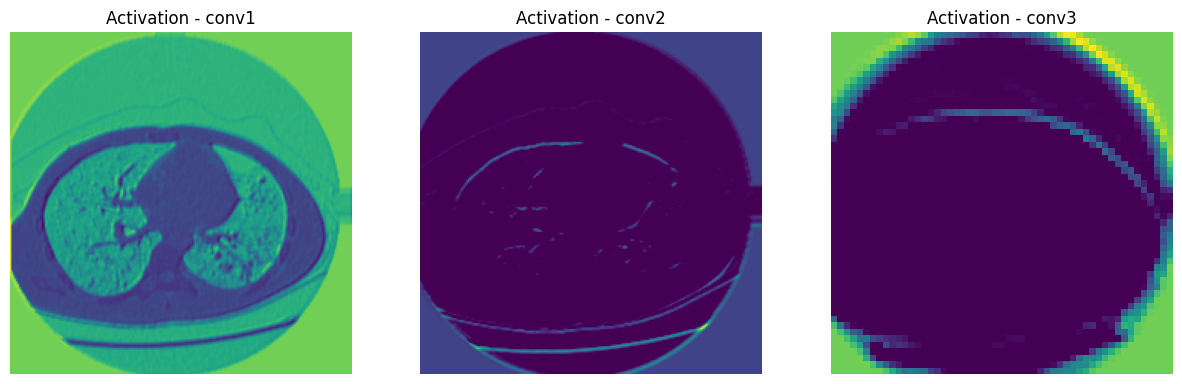

In [470]:
def visualize_activations(model, img_array, layers):

    img_array = np.expand_dims(img_array, axis=0)
    #img_array = preprocess_input(img_array)

    outputs = [model.get_layer(layer).output for layer in layers]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=outputs)

    activations = activation_model.predict(img_array)

    plt.figure(figsize=(15, 8))
    for i, activation in enumerate(activations):
        plt.subplot(1, len(layers), i + 1)
        plt.imshow(activation[0, :, :, 0], cmap='viridis')  # Adjust the indexing if needed
        plt.title(f'Activation - {layers[i]}')
        plt.axis('off')

    plt.show()

visualize_activations(lung_model, test_image_array, layer_names)

In [471]:
def generate_gradcam(model, img_array, layer_name):
    img_array = np.expand_dims(img_array, axis=0)
    grad_model = tf.keras.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        loss = predictions[:, 1]

    grads = tape.gradient(loss, conv_output)

    # Check if gradients are not None before proceeding
    if grads is None:
        print("Gradients are None. Skipping GradCAM computation.")
        return None, None, None

    guided_grads = (tf.cast(conv_output > 0, "float32") * tf.cast(grads > 0, "float32") * grads)

    weights = tf.reduce_mean(guided_grads, axis=(0, 1, 2))
    cam = np.dot(conv_output[0], weights)

    return cam, conv_output, predictions


def plot_gradcam(model, img_array, layer_name, label, confidence):
    cam, _, _ = generate_gradcam(model, img_array, layer_name)

    # Check if cam is None
    if cam is None:
        print("GradCAM is None. Skipping visualization.")
        return

    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Original Image: {label}\nConfidence: {confidence:.2%}')

    plt.subplot(1, 2, 2)
    plt.imshow(img_array, alpha=0.4)
    plt.imshow(cam, cmap='jet', alpha=0.8)
    plt.title(f'GradCAM ({layer_name})')

    plt.show()

1/1 [==============================] - 0s 25ms/step
Predicted class: Normal
Confidence: 100.00%
2


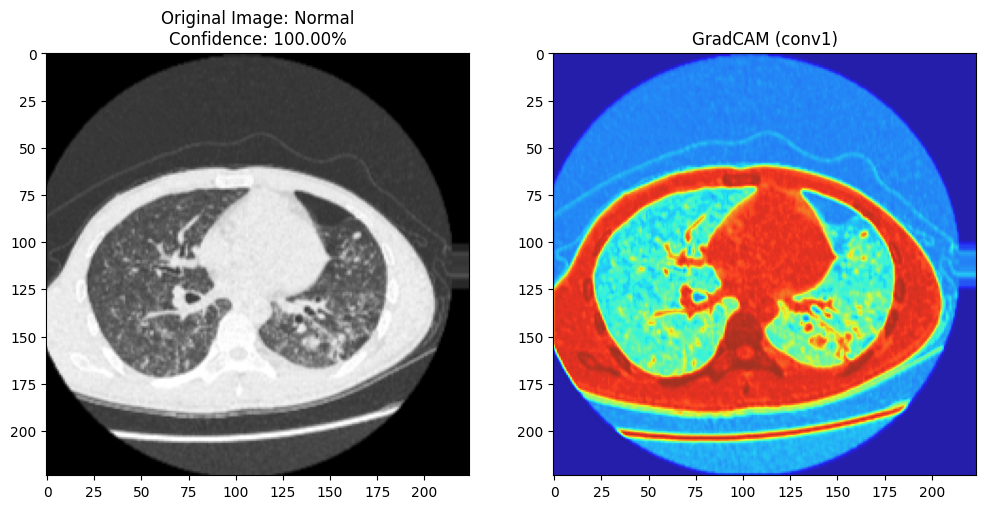

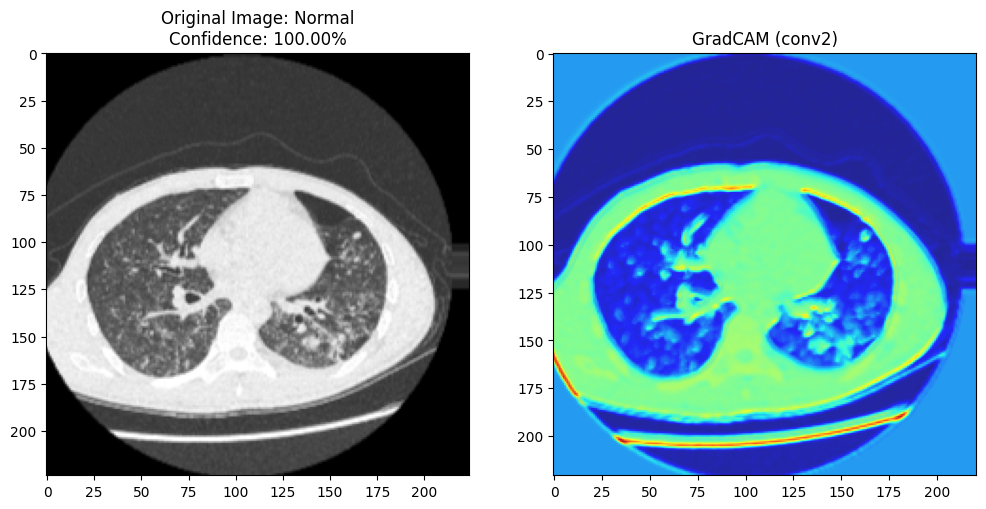

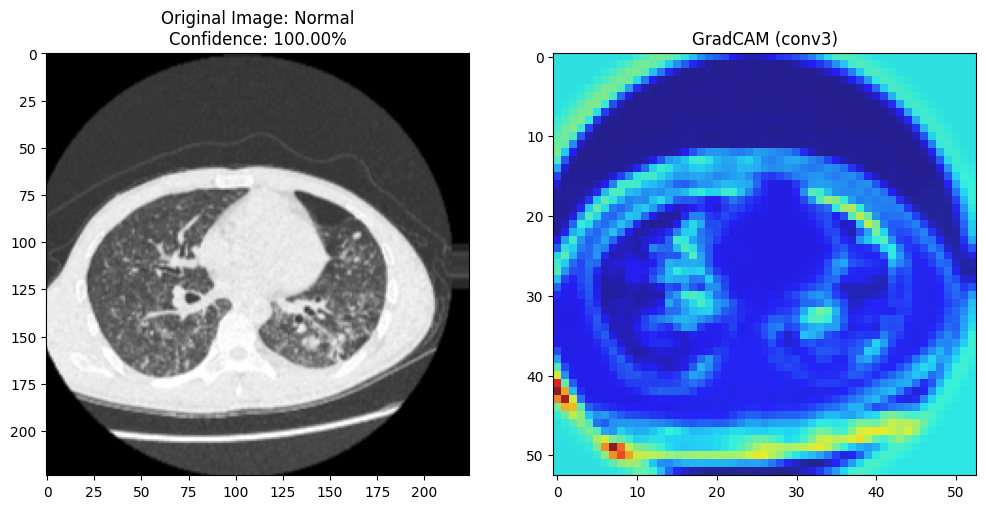

In [472]:
#predictions = fine_tuned_model.predict(preprocess_input(np.expand_dims(test_image_array, axis=0)))
predictions = lung_model.predict(np.expand_dims(test_image_array, axis=0))


predicted_class_index = np.argmax(predictions[0])
confidence = predictions[0][predicted_class_index]

class_labels = [
    "Normal",              # 0
    "Nodule",              # 1
    "Airspaces",           # 2
    "Bronch",              # 3
    "Parenchyma"           # 4
]

predicted_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_label}")
print(f"Confidence: {confidence:.2%}")

print(y_test[number])

for layer_name in layer_names:
    plot_gradcam(lung_model, test_image_array, layer_name, predicted_label, confidence)